<a href="https://colab.research.google.com/github/ttjh1234/Study_MLDL/blob/main/chapter03_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-최근접 이웃 회귀

농어의 무게 구하기 문제

첫 번째 방법으로 K-최근접 이웃 회귀 방법을 사용한다.

데이터는 https://bit.ly/perch_data 를 참조하여 사용하였다.


## 데이터 준비

데이터를 위 사이트에서 가지고와서 numpy에서 제공하는 

**np.array()**를 사용하여 데이터를 만들었다.

 추후에 모델에 학습시킬 훈련데이터는 **2차원 배열**이여야 하므로 형변환을 한다.

In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

print(type(perch_length))
print(perch_length.shape)


<class 'numpy.ndarray'>
(56,)


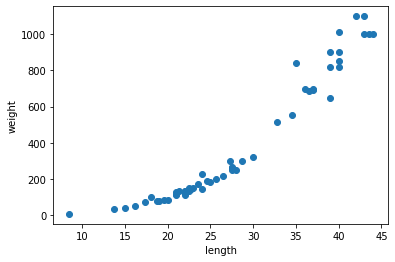

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


**Sklearn**의 **train_test_split**을 사용하여

train_set과 test_set으로 분리해준다.

그 후 학습을 위해 1차원 배열인 훈련데이터들을 2차원으로 바꾼다.

**reshape(x,y)**:넘파이 배열을 x행,y열로 바꾸어준다. 특성이 1개인 배열을 2차원으로 바꿀 때, 

**reshape(-1,1)**을 사용하여 바꿀 수 있다. *원칙은 (행 개수,1)

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(perch_length,perch_weight,random_state=42)

In [4]:
test_array=np.array([1,2,3,4,5,6])
print(test_array.shape)

(6,)


In [5]:
test_array=test_array.reshape(2,3)
print(test_array.shape)
print(test_array)

(2, 3)
[[1 2 3]
 [4 5 6]]


In [6]:
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
print(x_train.shape)
print(x_train[:5])

(42, 1)
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]]


## 결정계수(R^2)

회귀분석에서 자주 쓰이는 R^2 이지만, k-최근접 이웃 회귀 알고리즘의 결정계수는 조금 다르다.

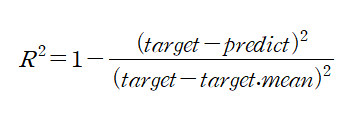

In [7]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print(knr.score(x_test,y_test))

0.9928094061010639


위 결과에서 보듯이 test_set을 적용한 결정계수 값이 매우 좋게 나왔다.

이제 test_set의 실제값과 모형으로 적합한 예측값의 차이를 확인해보겠다.

**sklearn.metrics** 의 **mean_absolute_error** 함수를 사용하겠다.


In [8]:
from sklearn.metrics import mean_absolute_error
y_predict=knr.predict(x_test)
mae=mean_absolute_error(y_test,y_predict)
print(mae)

19.157142857142862


## 과대적합 과 과소적합

In [9]:
print(knr.score(x_train,y_train))

0.9698823289099255


앞에서 test_set과의 비교를 하면 train_set이 더 낮게 나왔다.

보통 train_set의 점수가 조금 더 높게 나오지만, 

이 문제에서 train_set과 test_set의 크기가 작기 때문에 이러한 결과가 나왔다.

**과대적합** : train_set에 너무 잘맞는 모델이라 test_set에서 점수가 굉장히 나쁜 상황

**과소적합** : 과대적합의 반대로, train_set의 점수가 너무 높거나, 

train_set과 test_set 두 점수 모두 나쁜 상황 

위 문제에서는 과소적합이기 때문에 모델을 조금 더 복잡하게 만든다.

k-최근접 이웃 회귀 모델에서 default n_neighbors는 **5**인데,

**n을 줄여** 조금 더 이웃사이에 국지적으로 영향을 받게 만들면 더 복잡한 모형이 된다.

In [10]:
print(knr.score(x_train,y_train))
knr.n_neighbors=3

knr.fit(x_train,y_train)
print('train_set의 R^2:',knr.score(x_train,y_train))
print('test_set의 R^2:',knr.score(x_test,y_test))

0.9698823289099255
train_set의 R^2: 0.9804899950518966
test_set의 R^2: 0.974645996398761
